To play slideshow, run this command in the terminal:
```
$ jupyter nbconvert intro-to-testing-presentation.ipynb --to slides --post serve --SlidesExporter.reveal_theme=night --SlidesExporter.reveal_transition=none
```

# Getting Started Testing in Data Science

Jes Ford, PhD

Data Scientist

<table><tr><td><img src="img/pytest.png" style="width: 300px;"></td></tr></table>

# Jes Ford

Data Scientist at Recursion in Salt Lake City.

- Originally from Alaska, have followed the snow all around the western US/Canada
- PhD in Astrophysics from UBC, Vancouver
- Postdoc in Data Science at UW, Seattle
- like many data scientists, no formal training in software best practices

<br>

<div style="background-color:white">
<table bordercolor="white"><tr>
<td> <img src="img/Recursion.png" alt="Drawing" style="width: 200px;"/> </td>
<td> <p style="color:black;font-size:16px;border:none;"><b>Drug discovery, reimagined through Artificial Intelligence</b><br>We are hiring data scientists, ML researchers, engineers, and more:<br> www.recursionpharma.com/careers </p></p></td>
</tr></table>
</div>

## The plan

In [ ]:
def presentation():
    motivate_testing()
    introduce_testing_with_pytest()
    data_science_workflows()
    data_science_example_tests()
    wrap_up()

## Why talk about testing?

I care about code quality...

meaning clean code\* that gives *correct results*

\* topic for another day: PEP8, code is read much more often than it is written!

## Why test?

- Tests can give you evidence that your code is working as expected
- Tests give you confidence to make changes without fear of breaking something
- Tests make other people trust your code more

## Why *not* test?

Writing tests takes time!

### The Struggle

As a data scientist I am constantly struggling with these competing goals:

- getting results as quickly as possible
- being as confident as possible that I've got the right answer
  
$\rightarrow$ How do we balance these interests in the optimal way?

This is what my talk is all about. Not just how to write tests, but how to decide when its worth the time and effort.

## In this talk...


- I will *not* insist that you always write tests

- I will describe different scenarios I find myself in as a data scientist and how I try to be confident that my results are correct

- I will show you how to get started testing 

## Disclaimer

- I am not a testing expert or a software engineer

- "data science" covers a huge range of job duties and formal testing is less important in some of them (one-off analyses vs committing to production code base)

## How do you know if your code is correct??
- manual sanity checks
- defensive programming
- tests

## How do you know if your code is correct??
- manual sanity checks
- defensive programming: **assertions within the code**
- tests

In [1]:
# assertion example
def hello_to_all(list_of_names):
    assert len(list_of_names) > 0, 'There is no one here'
    print('Hello {}!'.format(', '.join(list_of_names)))

In [2]:
hello_to_all(['Parker', 'Missy', 'Taylor'])

Hello Parker, Missy, Taylor!


In [3]:
hello_to_all([])

AssertionError: There is no one here

### Assertions

are a careful data scientist's best friend. This is your middle ground of checking for expected behavior with extremely minimal effort! Check that you don't have any duplicated data, missing values, consistent dataframe shapes, column data types, etc.

If you take nothing else away from this talk, start adding assertions within your code.

## Simple test example

In [4]:
def backwards_allcaps(text):
    return text[::-1].upper()

In [5]:
backwards_allcaps('Python')

'NOHTYP'

In [6]:
def test_backwards_allcaps():
    assert backwards_allcaps('pycon') == 'NOCYP'
    assert backwards_allcaps('Cleveland') == 'DNALEVELC'

## pytest

- less boilerplate $\rightarrow$ easier/faster test writing
- automatically handles finding, collecting, running, evaluating your tests
- when tests fail you can get a lot of useful info
- lots of powerful built in features
- just works (with benefits) on existing tests written for unittest or nose

`$ pip install pytest`

vs unittest requires tests to be wrapped inside classes which subclass from unittest.TestCase; pytest you just write functions with simple regular assert statements, which easier to read/write


## Where do tests go?

This is a typical directory layout, but its not required. You can tell pytest where to look for tests, so really you *can* put them pretty much anywhere.

```
myproject/
    myproject/
        myproject.py
        utils.py
        __init__.py
    tests/
        test_myproject.py
    setup.py
    README.md
    LICENSE.txt
```

pytest searches all directories below the current directory for files that start or end with "test" (`test_*.py`, `*_test.py`) and runs any functions and classes like `def test_the_things()` and `class TestStuff()`.

## Test Driven Development

TDD: write the test *before* you write the code it is testing.

- reasons to use TDD:
  - makes you define your code requirements up front
  - helps frame how you'll write the code
  - is more fun
- reasons to not use TDD:
  - not always possible to define requirements up front (data exploratoration)
  - time constraints (need quick bugfix)

## pytest TDD demo

In [7]:
# contents of demo_tdd.py

def backwards_allcaps(text):
    return text[::-1].upper()


def test_backwards_allcaps():
    assert backwards_allcaps('pycon') == 'NOCYP'
    assert backwards_allcaps('Cleveland') == 'DNALEVELC'

How to run tests?


```
$ pytest demo_tdd.py
```

<img src="img/tdd_1.png" style="width: 1100px;">

<img src="img/tdd_2.png" style="width: 1100px;">

### *New feature:* whitespace should be removed from input text

In [8]:
def backwards_allcaps(text):
    return text[::-1].upper()


def test_backwards_allcaps():
    assert backwards_allcaps('pycon') == 'NOCYP'
    assert backwards_allcaps('Cleveland') == 'DNALEVELC'

### TDD:
1. add a test
2. run the test (it should fail)
3. add the feature
4. run the test

### *New feature:* whitespace should be removed from input text

In [42]:
def backwards_allcaps(text):
    return text[::-1].upper()


def test_backwards_allcaps():
    assert backwards_allcaps('pycon') == 'NOCYP'
    assert backwards_allcaps('Cleveland') == 'DNALEVELC'


def test_letters_only():
    assert backwards_allcaps('Salt Lake City') == 'YTICEKALTLAS'  # step 1

<img src="img/tdd_3.png" style="width: 1100px;">

### *New feature:* whitespace should be removed from input text

In [43]:
def backwards_allcaps(text):
    return text[::-1].replace(' ', '').upper()            # step 2


def test_backwards_allcaps():
    assert backwards_allcaps('pycon') == 'NOCYP'
    assert backwards_allcaps('Cleveland') == 'DNALEVELC'


def test_letters_only():
    assert backwards_allcaps('Salt Lake City') == 'YTICEKALTLAS'  # step 1

<img src="img/tdd_5.png" style="width: 1100px;">

### That's great, but these examples were dumb

1. these test examples don't really apply to data science work
2. this TDD workflow isn't always reasonable during research & exploration

# Data Science Domain Problems

- dataframes are the input and output of your functions
- working with databases
- ML models with non-deterministic outcomes
- acceptable tolerances on results
- testing for properties of things rather than exact values

# Data Science Workflows

1. "One-off analysis"
2. Exploratory
3. Well defined problem

## Data Science Workflows
1. **"One-off analysis"** $\leftarrow$
2. Exploratory
3. Well defined problem

### For one-off analyses I do not write tests, but instead focus on clear documentation in case the analysis gets revisited. 

If it *does* get revisited, I'll consider breaking the code out of a notebook and into a module (possibly refactoring) and adding some tests.

## Data Science Workflows
1. "One-off analysis"
2. **Exploratory** $\leftarrow$
3. Well defined problem

### Its impractical to write tests during the exploratory phase. However, if things go well there is almost always code created along the way which is useful in a later stage of the project.

Judgment call needed as my legacy/untested code base grows...

## Data Science Workflows
1. "One-off analysis"
2. Exploratory
3. **Well defined problem**  $\leftarrow$

### If I'm writing code for a fairly well defined problem, which I know will be re-used, I try very hard to write tests as I develop the code.

## Data Science Workflows
1. "One-off analysis"
2. **Exploratory**  $\leftarrow$
3. Well defined problem
4. **Legacy code**  $\leftarrow$

### Once I realize I will need to reuse code, I try to start adding tests *when I modify it.*

Generally, if I'm confident something is working now, I'll only bother to add tests when I'm adding features or fixing bugs. (Inspired by [Justin Crown's PyCon 2018 talk](https://www.youtube.com/watch?v=LDdUuoI_lIg)).

# Data Science Domain Problems

Examples of tests for common data science problems

## Working with Pandas DataFrames

Checking for duplicates and missing values.

In [106]:
import pandas as pd
import numpy as np


df = pd.DataFrame({'channel': ['email', 'paid_search', 'display', 'email'],
                   'customer': [1, 4, 4, 3],
                   'order': [1010, 2050, 2050, 3232]})
df

,channel,customer,order
0,email,1,1010
1,paid_search,4,2050
2,display,4,2050
3,email,3,3232


In [107]:
assert df.notnull().all().all()
assert ~df.isnull().any().any()
assert df.isnull().sum().sum() == 0

## Working with Pandas DataFrames

Checking for duplicates and missing values.

In [108]:
df

,channel,customer,order
0,email,1,1010
1,paid_search,4,2050
2,display,4,2050
3,email,3,3232


In [109]:
assert ~df.duplicated().any()

In [110]:
if df.duplicated(subset=['order']).any():
    raise ValueError('Duplicate records found for order')

ValueError: Duplicate records found for order

## Working with Pandas DataFrames

Built in utilities that help you test.

In [111]:
from pandas.util.testing import assert_frame_equal
from pandas.util.testing import assert_index_equal
from pandas.util.testing import assert_series_equal

In [112]:
df2 = df.copy()

In [113]:
assert_frame_equal(df, df2,
                   check_like=True,       # order of columns/rows doesn't matter
                   check_dtype=False,     # check for identical data types
                   check_less_precise=4)  # number of digits to compare

## Working with Pandas DataFrames

Built in utilities that help you test.

In [114]:
df2.loc[0, 'channel'] = np.nan
df1 = df2.copy()

In [115]:
# df1 = df1.style.set_properties(**{'background-color': '#545353',
#                                   'border-color': 'black'}).hide_index()
# df2 = df2.style.set_properties(**{'background-color': '#545353',
#                                   'border-color': 'black'}).hide_index()

In [116]:
df1

,channel,customer,order
0,NaN,1,1010
1,paid_search,4,2050
2,display,4,2050
3,email,3,3232


In [117]:
df1 == df2

,channel,customer,order
0,False,True,True
1,True,True,True
2,True,True,True
3,True,True,True


## Working with Pandas DataFrames

Built in utilities that help you test.

In [118]:
display(df1)
display(df2)

,channel,customer,order
0,NaN,1,1010
1,paid_search,4,2050
2,display,4,2050
3,email,3,3232


,channel,customer,order
0,NaN,1,1010
1,paid_search,4,2050
2,display,4,2050
3,email,3,3232


In [119]:
assert_frame_equal(df1, df2)  # handles NaN or None comparisons "as expected"

# Generating DataFrames for testing

Because hardcoding input/output dataframes is *extremely* verbose

## Hypothesis

Automatic data generation for property based testing

In [29]:
from hypothesis import strategies as st


print('Examples of integers:')
print(st.integers().example())
print(st.integers().example())
print(st.integers().example())

Examples of integers:
10034
11631327605666483133483599321375631813
-5203


In [30]:
# contents of demo_hypothesis.py
from hypothesis import given
from hypothesis import strategies as st


def backwards_allcaps(text):
    return text[::-1].upper()


@given(st.text())
def test_backwards_allcaps(input_string):
    modified = backwards_allcaps(input_string)
    assert input_string.upper() == ''.join(reversed(modified))

<img src="img/hypothesis_show_stats.png" style="width: 1200px;">

## Hypothesis + Pandas

In [31]:
from hypothesis.extra.pandas import data_frames, column

data_frames([column('customer', elements=st.integers(min_value=0), dtype=int, unique=True),
             column('price', dtype='float'), 
             column('prob_return', elements=st.floats(min_value=0, max_value=1))
            ]).example()

,customer,price,prob_return
0,60528,NaN,0.142494
1,221765,NaN,0.918735
2,61622,NaN,0.312201
3,23756,-0.333333,0.142494
4,109359,NaN,0.142494
5,67607,NaN,0.142494
6,13661,NaN,0.235108
7,170377,0.333333,0.768137
8,6925,NaN,0.140033


## Hypothesis + Pandas

In [32]:
from hypothesis.extra.pandas import data_frames, column

data_frames([column('customer', elements=st.integers(min_value=0), dtype=int, unique=True),
             column('price', dtype='float'), 
             column('prob_return', elements=st.floats(min_value=0, max_value=1))
            ]).example()

,customer,price,prob_return
0,114477,1.407635e-98,0.904867
1,33346,1.000000e+07,0.127720
2,16107,-1.797693e+308,0.127720
3,276357,-inf,0.127720
4,22816,1.000000e+07,0.127720
5,62213,inf,0.127720
6,20190,1.100000e+00,0.127720
7,162780,-1.000000e-05,0.127720


## Testing properties of data

In [36]:
df_customers = pd.DataFrame(
    {'days_since_last_order': np.random.randint(low=0, high=365, size=1000),
     'num_total_orders': np.random.geometric(0.5, size=1000)})

df_customers.head()

,days_since_last_order,num_total_orders
0,314,1
1,158,1
2,242,1
3,90,1
4,357,1


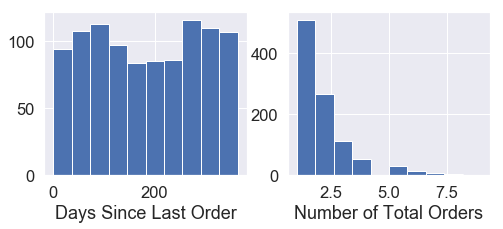

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=1.5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
df_customers.days_since_last_order.hist(ax=ax1)
df_customers.num_total_orders.hist(ax=ax2)
ax1.set_xlabel('Days Since Last Order')
ax2.set_xlabel('Number of Total Orders')
plt.show();

## Testing properties of data

In [38]:
from scipy.special import expit  # logistic function


def probality_loyal_customer(df):
    "Return customer probability of returning."
    p_num_orders = df.num_total_orders.apply(expit)
    p_days_ago = df.days_since_last_order / df.days_since_last_order.max()
    p_loyal = p_days_ago * p_num_orders
    return p_loyal

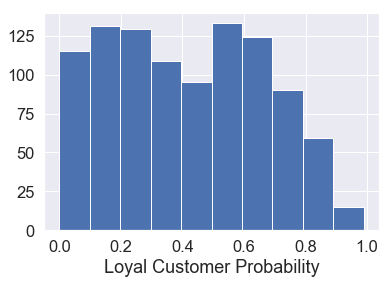

In [39]:
prob_loyal = probality_loyal_customer(df_customers)
prob_loyal.hist()
plt.xlabel('Loyal Customer Probability');

In [40]:
# contents of demo_pandas_hypothesis.py
from hypothesis import given
from hypothesis import strategies as st
from hypothesis.extra.pandas import data_frames, column
from scipy.special import expit


def probability_loyal_customer(df):
    "Return customer probability of returning."
    p_num_orders = df.num_total_orders.apply(expit)
    p_days_ago = df.days_since_last_order / df.days_since_last_order.max()
    p_loyal = p_days_ago * p_num_orders
    return p_loyal


@given(
    data_frames([
        column('days_since_last_order', dtype=int,
               elements=st.integers(min_value=0, max_value=365)),
        column('num_total_orders', dtype=int,
               elements=st.integers(min_value=0, max_value=1_000_000))])
)
def test_prob_loyality(df):
    p = probability_loyal_customer(df)
    assert p.between(0, 1, inclusive=True).all()

<img src="img/pandas_hypothesis.png" style="width: 1200px;">

# Working with Databases

### Testing a function that queries the DB

In [ ]:
# my_data_loader.py
import pandas as pd
import query_database


def load_data(condition=''):
    sql_query = f'select id, type, val from some_table {condition}'
    df_raw = query_database(sql_query)
    df = pd.get_dummies(df_raw, columns=['type'])
    df.index = df.pop('id')
    return df

In [ ]:
# test_data_loader.py
import pytest
import my_data_loader
from pandas.util.testing import assert_frame_equal


@pytest.fixture(params=[{'condition': 'where val > 100', 'output': out1}])
def sample_data(request):
    return request.param


def test_load_data(sample_data):
    # problem: we might not want to query the DB as part of our tests
    output = my_data_loader.load_data(sample_data['condition'])
    assert_frame_equal(output, sample_data['output'])

## mocker

pytest-mock is a plugin that lets you patch or swap out one piece of code for another

### Testing a function that queries the DB

In [ ]:
# my_data_loader.py
import pandas as pd
import query_database


def load_data(condition=''):
    sql_query = f'select id, type, val from some_table {condition}'
    df_raw = query_database(sql_query)
    df = pd.get_dummies(df_raw, columns=['type'])
    df.index = df.pop('id')
    return df

In [ ]:
# test_data_loader.py
import pytest
import my_data_loader
from pandas.util.testing import assert_frame_equal


@pytest.fixture(params=[{'input': in1, 'output': out1}])
def sample_data(request):
    return request.param


def test_load_data(sample_data, mocker):
    mocker.patch('my_data_loader.query_database',
                 side_effect=lambda x: sample_data['input'])
    output = my_data_loader.load_data('')
    assert_frame_equal(output, sample_data['output'])

# A few additional pytest features...

## tmpdir

- create temporary directories and files that your tests need
- automatically removed afterwards
- see also tmpdir_factory

In [ ]:
# example from pytest documentation

def test_create_file(tmpdir):
    p = tmpdir.mkdir("sub").join("hello.txt")
    p.write("content")
    assert p.read() == "content"
    assert len(tmpdir.listdir()) == 1

## mark

you can organize your tests using marks - there are a few built in ones, and you can create your own

In [ ]:
import pytest
import sys


@pytest.mark.skip
def test_always_skip():
    pass


@pytest.mark.skipif(sys.platform == 'darwin',
                    reason='Feature not supported on OS X')
def test_not_on_mac():
    pass


@pytest.mark.slow  # custom mark
def test_that_takes_a_long_time():
    pass

```sh
$ pytest -m slow
```

## parametrize

In [ ]:
# example from pytest documentation

import pytest


@pytest.mark.parametrize("x, y", [(0, 1), (2, 3)])
def test_foo(x, y):
    assert x + 1 == y


@pytest.mark.parametrize("x", [0, 1])
@pytest.mark.parametrize("y", [2, 3])
def test_more_foo(x, y):
    pass  # all combinations of x, y

## Wrap up

- data scientists should not *always* write tests
  - (but we should always practice defensive programming)
- any reused or shared piece of code should probably be tested, especially in production
- strive for a balance between speed and confidence in your results
  - testing can help you acheive this!

### Some aspects of data science code are really hard to test!

- ML results? probabilistic outcomes?
- Think about testing properties of your data
  - distributions, missing data, expected features and datatypes

## Link to slides

https://github.com/jesford/testing-in-data-science

## Resources & Credits

- **General testing resources**
  - Andreas Pelme's [Introduction to pytest](https://www.youtube.com/watch?v=LdVJj65ikRY) from EuroPython 2014
  - Mark Vousden's [Python testing](https://www.youtube.com/channel/UCKaKhMyhboLoMwmeF9yxg9w) 3-part series of youtube videos
  - Justin Crown's ["WHAT IS THIS MESS?" - Writing tests for pre-existing code bases](https://www.youtube.com/watch?v=LDdUuoI_lIg) from PyCon 2018
  - Ned Batchelder's [Getting Started Testing](https://www.youtube.com/watch?v=FxSsnHeWQBY) from PyCon 2014 (focuses on unittest)

- **Data Science specific resources**
  - Trey Causey's [Testing for Data Scientists](https://www.youtube.com/watch?v=GEqM9uJi64Q) from PyData Seattle 2015
  - Eric Ma's [Best Testing Practice's for Data Science Tutorial](https://www.youtube.com/watch?v=yACtdj1_IxE) from PyCon 2017, with GitHub notebooks [here](https://github.com/ericmjl/data-testing-tutorial)

## Questions?